In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np

2024-07-19 13:47:42.591548: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-07-19 13:47:42.600109: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-07-19 13:47:42.666979: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-07-19 13:47:42.756843: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:479] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-07-19 13:47:42.835042: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:10575] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registe

In [2]:
# load dataset

dataset = keras.datasets.fashion_mnist
((img_train, img_train_identifier), (img_tests, img_tests_identifier)) = dataset.load_data()
name_classifications = ['Camiseta', 'Calça', 'Pullover', 'Vestido', 'Casaco', 'Sandália', 'Camisa','Tênis', 'Bolsa', 'Bota']

img_train.shape, img_tests.shape, img_train_identifier.shape, img_tests_identifier.shape

((60000, 28, 28), (10000, 28, 28), (60000,), (10000,))

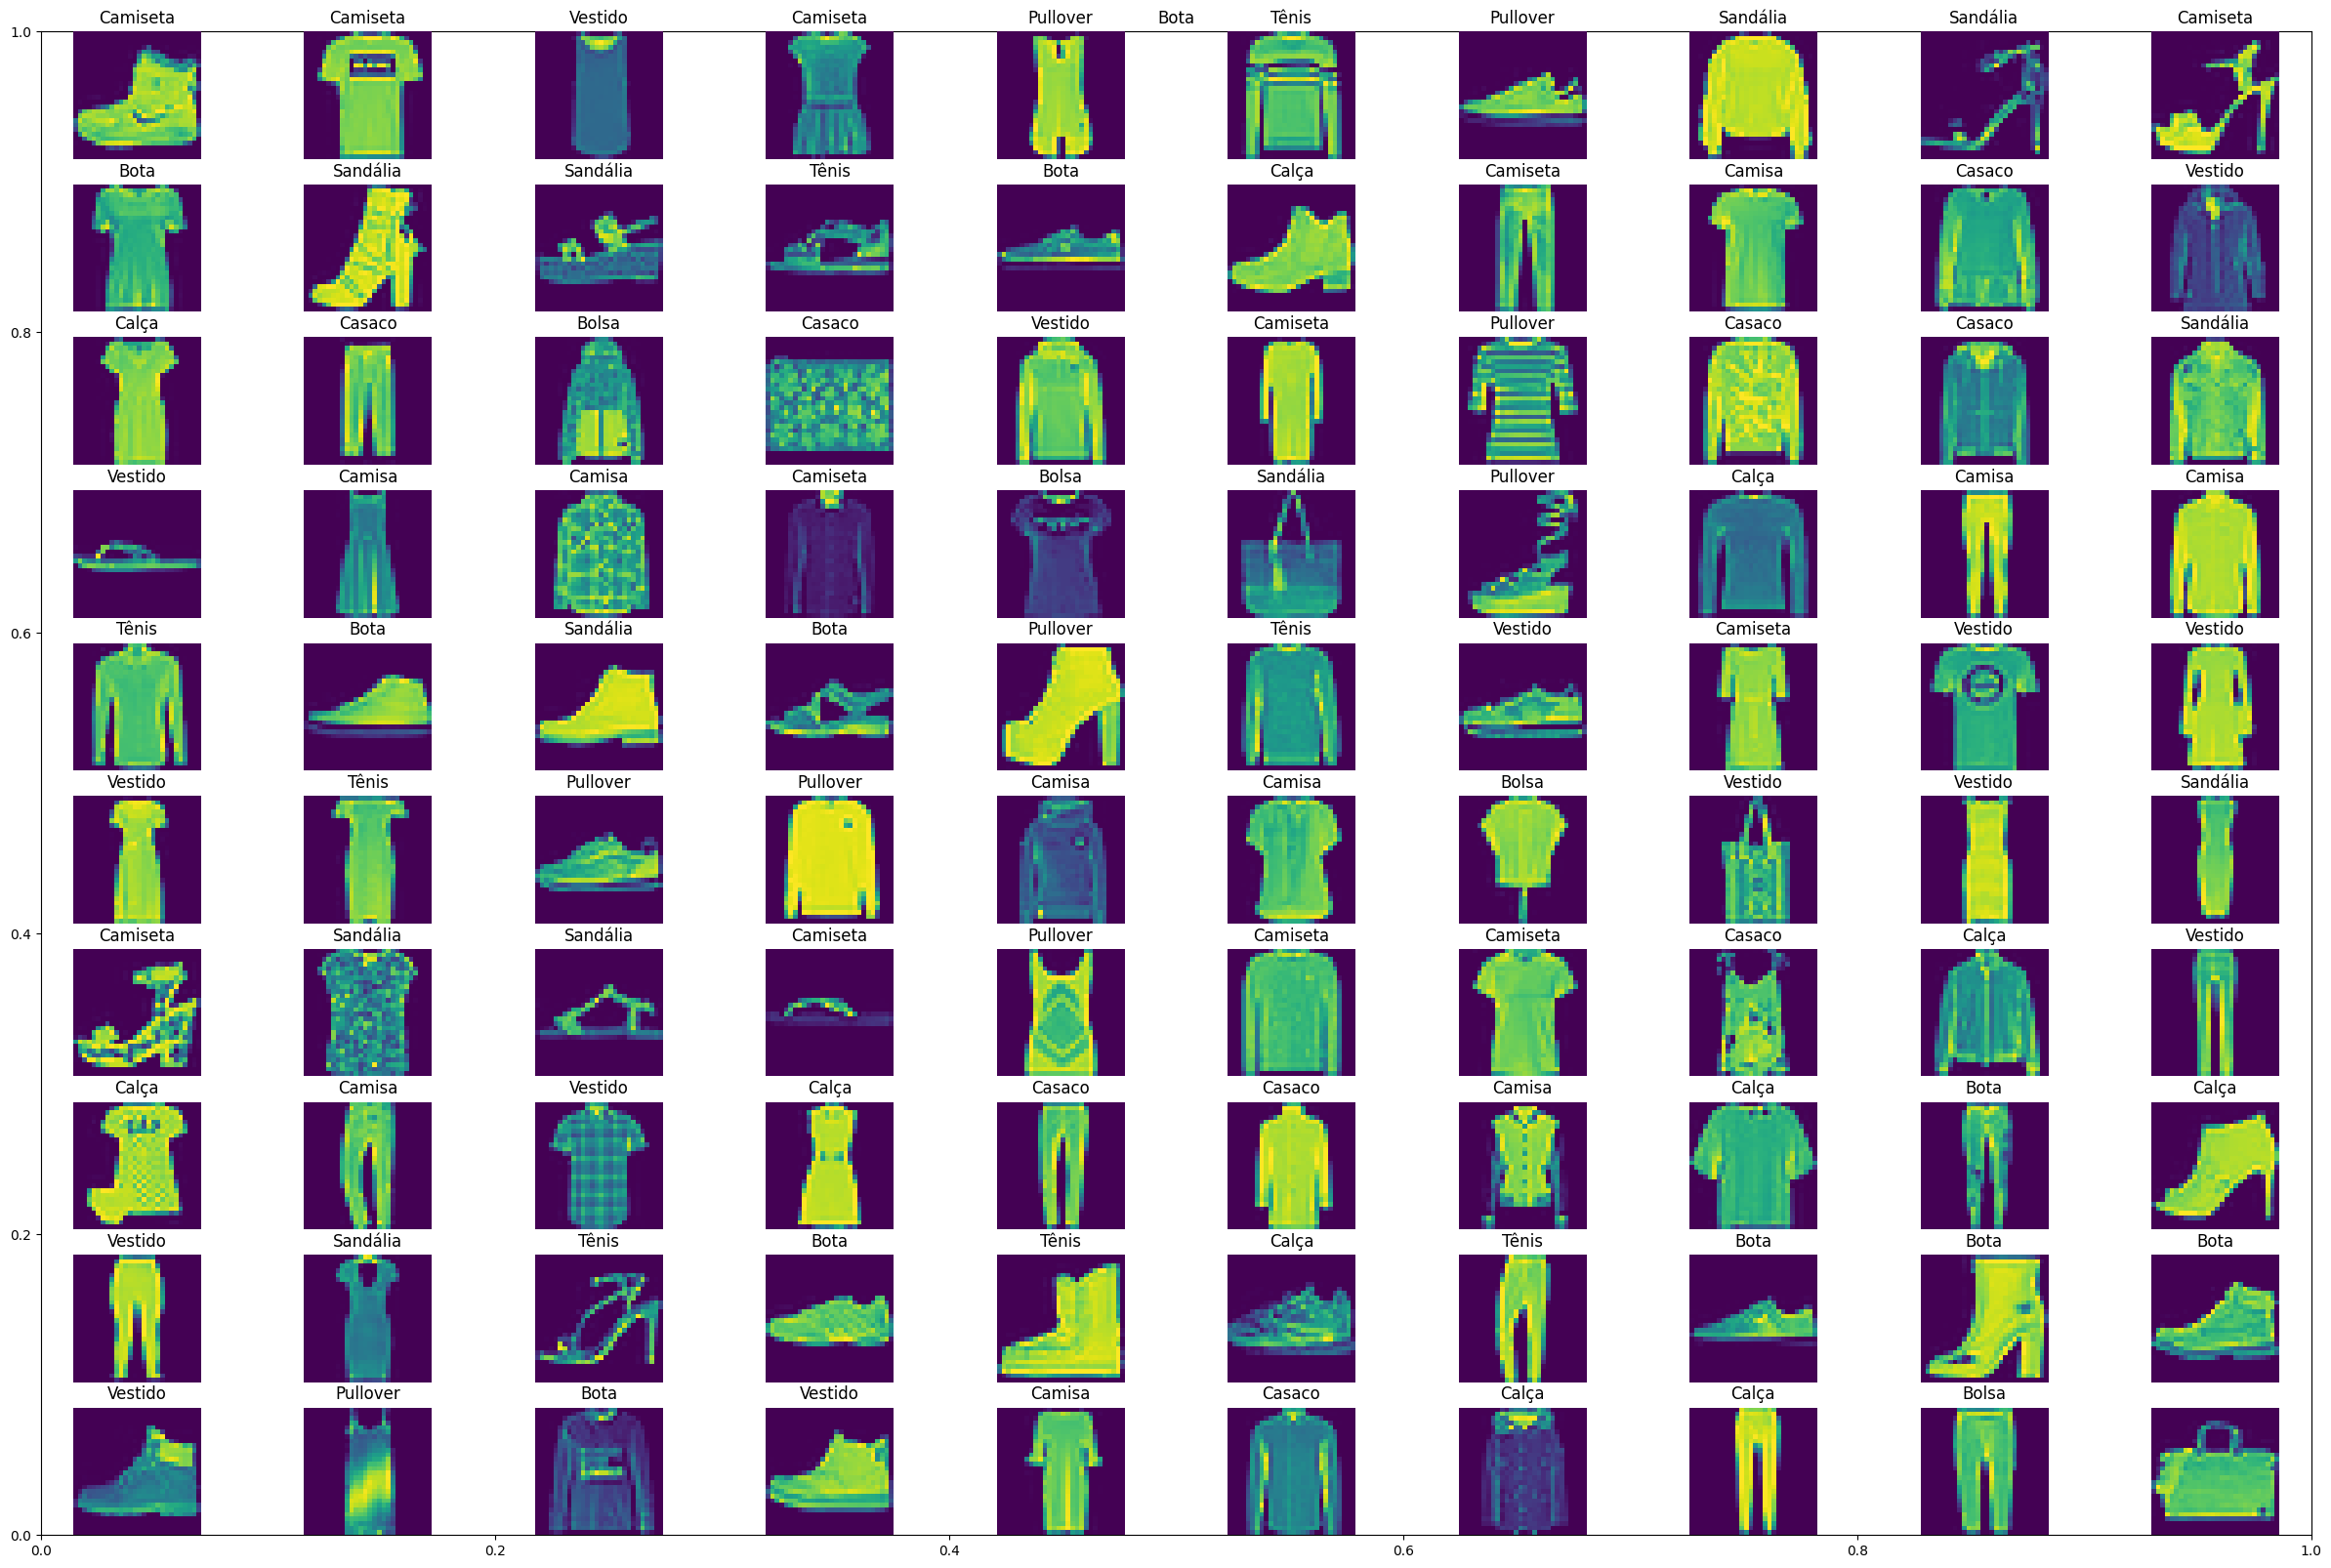

In [3]:
# show images

plt.figure(figsize=(30, 20))
for x in range(100):
    plt.title(f"{name_classifications[img_train_identifier[x]]}")
    plt.subplot(10, 10, x+1)
    plt.imshow(img_train[x])
    plt.axis('off')
plt.show()

In [4]:
#normalization and training

img_train = img_train / 255.0

model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(256, activation=tf.nn.relu), 
    keras.layers.Dropout(0.2), # 20% of the neurons will be disabled
    keras.layers.Dense(10, activation=tf.nn.softmax) 
])
call_backs = [keras.callbacks.EarlyStopping(monitor='val_loss'),
              keras.callbacks.ModelCheckpoint(filepath='model.keras', save_best_only=True)]

learning_rate = .002
optimizer = keras.optimizers.Adam(learning_rate=learning_rate)
model_compile = model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy']) # entropia categorica cruzada esparsa
historic = model.fit(img_train, img_train_identifier, epochs=100, validation_split=.2, callbacks=call_backs)

/home/gregorio/Documentos/PROJETOS/ESTUDOS/KERAS/.venv/lib/python3.10/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
2024-07-19 13:47:47.613966: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:998] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-07-19 13:47:47.614408: W tensorflow/core/common_runtime/gpu/gpu_device.cc:2251] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the requir

Epoch 1/100
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7696 - loss: 0.6449 - val_accuracy: 0.8437 - val_loss: 0.4269
Epoch 2/100
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8458 - loss: 0.4192 - val_accuracy: 0.8593 - val_loss: 0.3809
Epoch 3/100
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8583 - loss: 0.3863 - val_accuracy: 0.8698 - val_loss: 0.3609
Epoch 4/100
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8665 - loss: 0.3627 - val_accuracy: 0.8750 - val_loss: 0.3518
Epoch 5/100
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8733 - loss: 0.3442 - val_accuracy: 0.8733 - val_loss: 0.3446
Epoch 6/100
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8802 - loss: 0.3224 - val_accuracy: 0.8784 - val_loss: 0.3385
Epoch 7/100
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8776 - loss: 0.3239 - val_accuracy: 0.8697 - val_loss: 0.3488


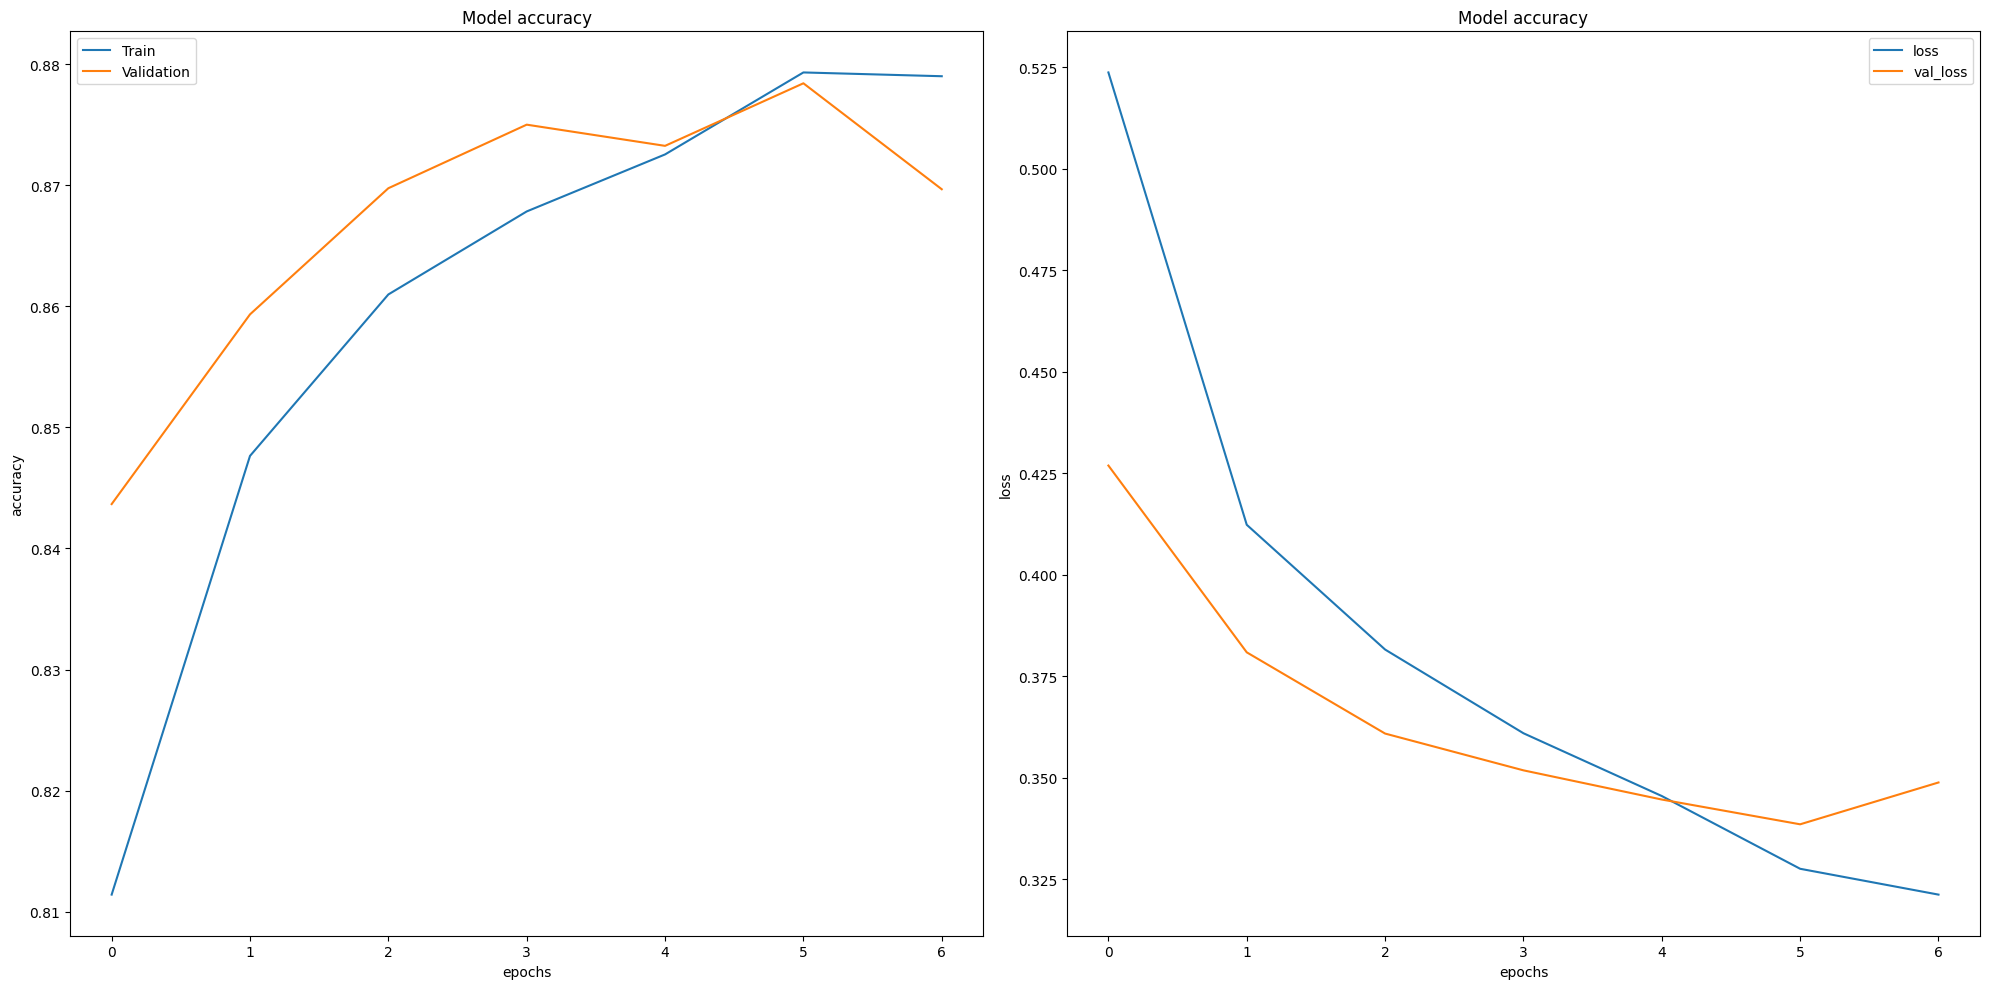

In [5]:
plt.figure(figsize=(20, 10))
plt.subplot(1, 2, 1) 
plt.plot(historic.history['accuracy'])
plt.plot(historic.history['val_accuracy'])
plt.legend(['Train', 'Validation'], loc='upper left')


plt.title('Model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epochs')
plt.legend(['accuracy', 'val_accuracy'])
plt.legend(['Train', 'Validation'], loc='upper left')


plt.subplot(1, 2, 2)
plt.plot(historic.history['loss'])
plt.plot(historic.history['val_loss'])

plt.title('Model accuracy')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend(['loss', 'val_loss']) 

plt.tight_layout()
plt.show()

In [6]:
# resume model

print(28 * 28)
print(784 * 256 + 256)
model.summary()


784
200960


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │       200,960 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 610,592 (2.33 MB)

 Trainable params: 203,530 (795.04 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 407,062 (1.55 MB)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
Tênis


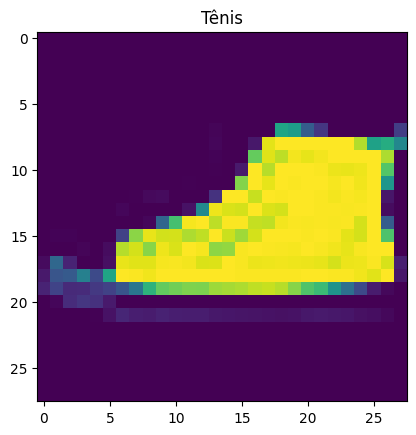

In [7]:
from random import randint

inx = randint(0, len(img_tests)-1)
plt.imshow(img_tests[inx])
plt.title(name_classifications[img_tests_identifier[inx]])
predict = model.predict(img_tests[inx].reshape(1, 28, 28))
index_predict = np.argmax(predict, axis=1)
print(name_classifications[index_predict[0]])

In [8]:
from keras.preprocessing.image import img_to_array, load_img


def load_and_preprocess_images(img_path, target_size):
    img = load_img(img_path)
    img_array = img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    return img_array / 255.0, img

In [9]:
# requests imagens
from glob import glob


img_paths = glob('imgs/*')
len(img_paths)

20

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


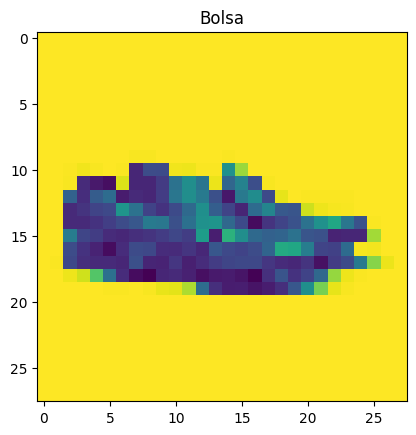

In [10]:
import cv2

def load_img(img_path):
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    img = cv2.resize(img, (28, 28))
    return img

imgs = [load_img(img_path) for img_path in img_paths]

for inx in range(len(imgs)):
    plt.imshow(imgs[inx])
    plt.title(name_classifications[index_predict[0]])
    predict = model.predict(imgs[inx].reshape(1, 28, 28))
    index_predict = np.argmax(predict, axis=1)

In [13]:
plt.figure(figsize=(30, 20))
for e, img in enumerate(img_paths):
    img, imagem = load_and_preprocess_images(img, (28, 28))

    result = model.predict(img)
    index_class = np.argmax(result, axis=1)
    
    plt.subplot(10, len(img_paths), e+1)
    plt.title(name_classifications[index_class[0]]) 
    plt.imshow(imagem)
    plt.axis('off')
plt.show()

In [ ]:
inx = randint(0, len(img_paths) -1)
img = img_paths[inx]

img, imagem = load_and_preprocess_images(img, (28, 28))
index_class = np.argmax(result, axis=1)

plt.title(name_classifications[index_class[0]]) 
plt.imshow(imagem)

TypeError: path should be path-like or io.BytesIO, not <class 'numpy.ndarray'>